### 1. Import the data and library

In [1]:
import pandas as pd
import numpy as np

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
print('\nShape of training data :',train_data.shape)
print('\nShape of testing data :',test_data.shape)


Shape of training data : (8523, 12)

Shape of testing data : (5681, 11)


### 2. Create column & Combining the data set forEDA

In [4]:
train_data["source"]="train"
test_data["source"]="test"
data = pd.concat([train_data,test_data], sort= True)

In [5]:
print (train_data.shape, test_data.shape, data.shape , sep = "\n")

(8523, 13)
(5681, 12)
(14204, 13)


### 3. Data Exploration

In [6]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train


In [7]:
data.tail()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
5676,Regular,FDB58,141.3154,NaN,Snack Foods,0.013496,10.5,1997,OUT046,Tier 1,Small,Supermarket Type1,test
5677,Regular,FDD47,169.1448,NaN,Starchy Foods,0.142991,7.6,2009,OUT018,Tier 3,Medium,Supermarket Type2,test
5678,Low Fat,NCO17,118.7440,NaN,Health and Hygiene,0.073529,10.0,2002,OUT045,Tier 2,NaN,Supermarket Type1,test
5679,Regular,FDJ26,214.6218,NaN,Canned,0.000000,15.3,2007,OUT017,Tier 2,NaN,Supermarket Type1,test
5680,Regular,FDU37,79.7960,NaN,Canned,0.104720,9.5,2002,OUT045,Tier 2,NaN,Supermarket Type1,test


In [8]:
data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  11765 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  10188 non-null object
Outlet_Type                  14204 non-null object
source                       14204 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 1.5+ MB


In [10]:
cat_col = data.select_dtypes(include="object")

for c in cat_col:
    if c not in( 'Item_Identifier','Outlet_Identifier','source'):
        print( "\n Feature:",c)
        print(data[c].value_counts())


 Feature: Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

 Feature: Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

 Feature: Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

 Feature: Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

 Feature: Outlet_Type
Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Super

   - All the categorical columns needs to be converted. 
   - In "Item_Fat_Content" column, ( Low Fat    : LF : low fat  ) , (Regular:reg) needs to be changed
   - We can combine some cat. in "Item_Type" columns
   - In "Outlet_Type" column, Supermarket Type2 and Type3 can be combined. But we should check if that’s a good idea before doing it.

### 4 Data Visualization

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

#### 4.1 Univariant Analysis

#### a)Target Column

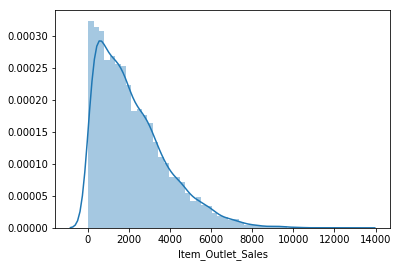

Skewness: 1.177531
Kurtsis: 1.615877


In [12]:
sns.distplot(train_data['Item_Outlet_Sales'])
plt.show()

print('Skewness: %f' % train_data['Item_Outlet_Sales'].skew())
print('Kurtsis: %f' %train_data['Item_Outlet_Sales'].kurt())

Observetions:
- Deviation from the normal distribution.
- There is  positive skewness.
- Shows peakedness.

#### b) Numeric variables

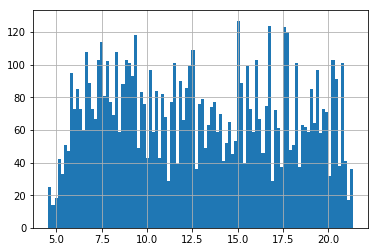

In [13]:
train_data['Item_Weight'].hist(bins = 100);
plt.show()

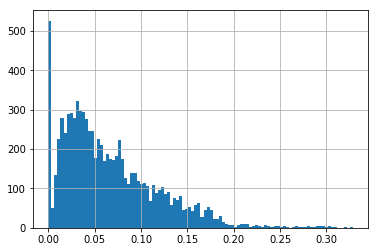

In [14]:
train_data['Item_Visibility'].hist(bins = 100);
plt.show()

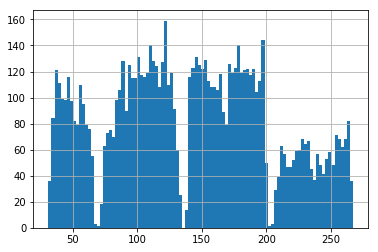

In [15]:
train_data['Item_MRP'].hist(bins = 100);
plt.show()

###### Observations:
    Item_Weight does not have any clear pattern. 
    Item_Visibility is right-skewed and should be transformed.
    There are  4 different distributions for Item_MRP

#### c) Categorical variables

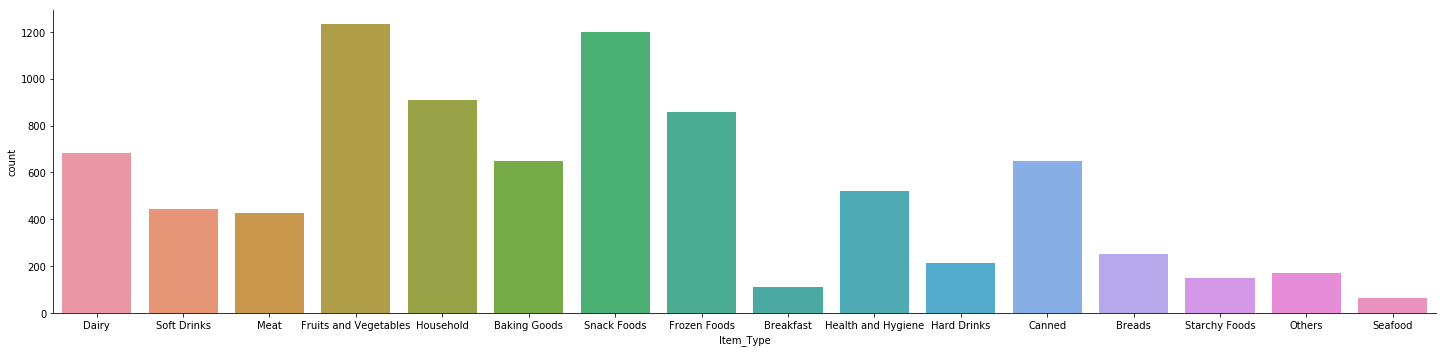

In [16]:
sns.catplot(x= "Item_Type", data= train_data, kind = "count", aspect=4)
plt.show()

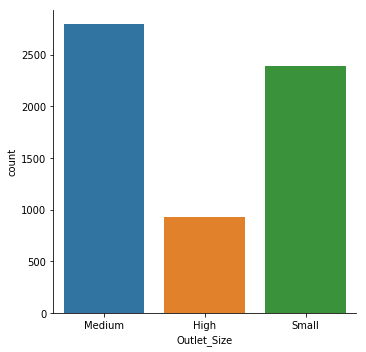

In [17]:
sns.catplot(x= "Outlet_Size", data= train_data, kind = "count")
plt.show()

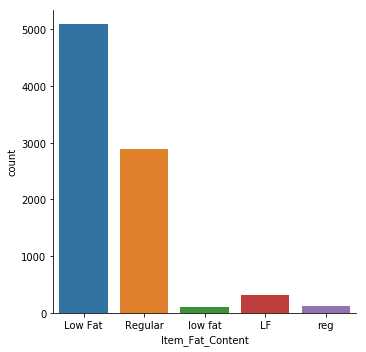

In [18]:
sns.catplot(x= "Item_Fat_Content", data= train_data, kind = "count")
plt.show()

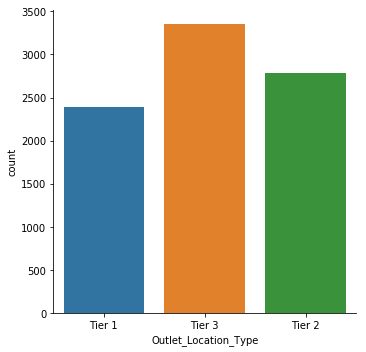

In [19]:
sns.catplot(x= "Outlet_Location_Type", data= train_data, kind = "count")
plt.show()

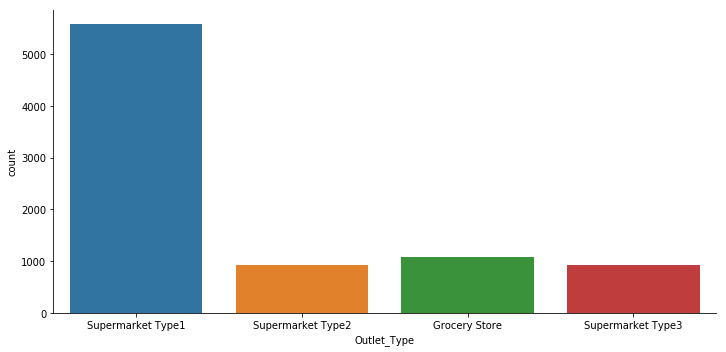

In [20]:
sns.catplot(x= "Outlet_Type", data= train_data, kind = "count",aspect=2)
plt.show()

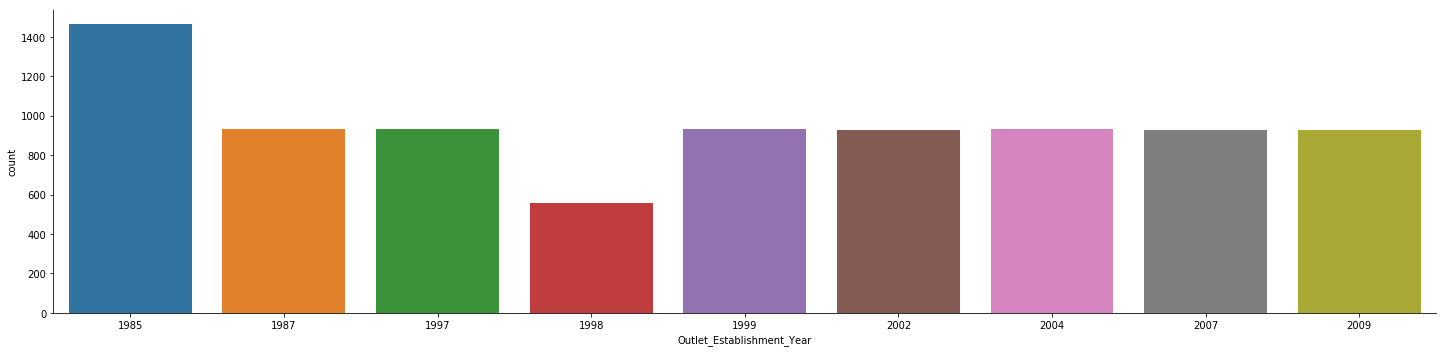

In [21]:
data["Outlet_Establishment_Year"]=data["Outlet_Establishment_Year"].astype("category")
sns.catplot(x= "Outlet_Establishment_Year", data= train_data, kind = "count", aspect=4)
plt.show()

#### Observations:
    In "Item_Fat_Content" column Low Fat, LF , low fat  means the same. Regular, reg means the same
    In "Outlet_Type" Supermarket_Typee is the most popular Type.
    "Outlet_Establishment_Year" - 1998 has less data
    

#### 4.2 Bivariant Analysis

##### a) Target Variable vs Numerical Variables

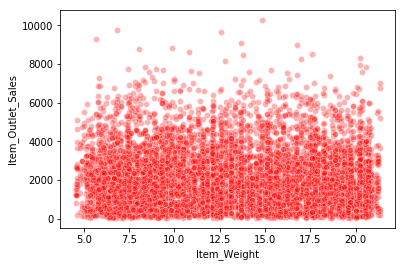

In [22]:
sns.scatterplot(x = "Item_Weight" , y ="Item_Outlet_Sales" , data = train_data, alpha = 0.3, color = "r")
plt.show()

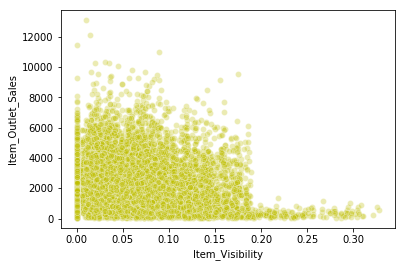

In [23]:
sns.scatterplot(x = "Item_Visibility" , y ="Item_Outlet_Sales" , data = train_data, alpha = 0.3, color = "y")
plt.show()

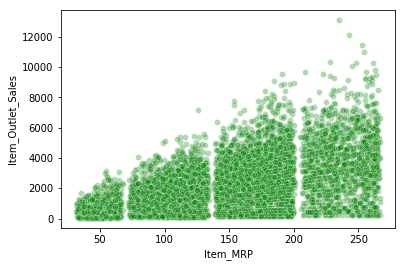

In [24]:
sns.scatterplot(x = "Item_MRP" , y ="Item_Outlet_Sales" , data = train_data, alpha = 0.3, color = "g")
plt.show()

###### Observations:
    Item_Outlet_Sales is spread well across the entire range of the Item_Weight. 
    In Item_Visibility vs Item_Outlet_Sales, there is a string of points at Item_Visibility = 0.0.But Item visibility cannot be completely zero.
    In Item_MRP vs Item_Outlet_Sales, we can  see 4 segments of prices. We can use this to create a new variable.

##### b) Target Variable vs Categorical Variables

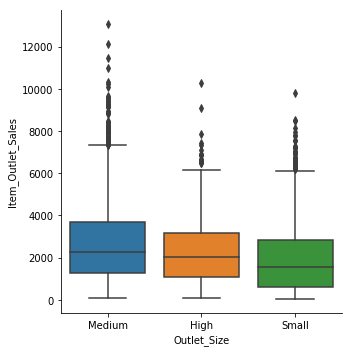

In [25]:
sns.catplot(x= "Outlet_Size", y = "Item_Outlet_Sales" ,data= train_data, kind = "box")
plt.show()

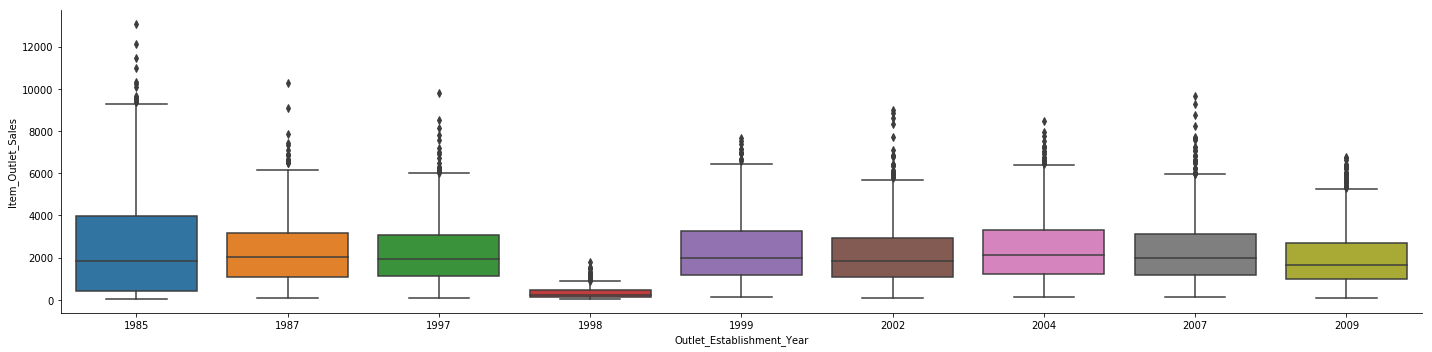

In [26]:
sns.catplot(x= "Outlet_Establishment_Year", y = "Item_Outlet_Sales" ,data= train_data, kind = "box", aspect=4)
plt.show()

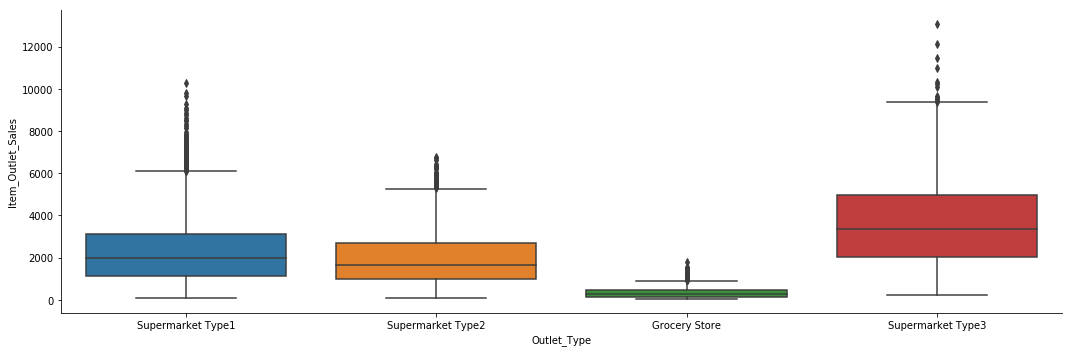

In [27]:
sns.catplot(x= "Outlet_Type", y = "Item_Outlet_Sales" ,data= train_data, kind = "box", aspect=3)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

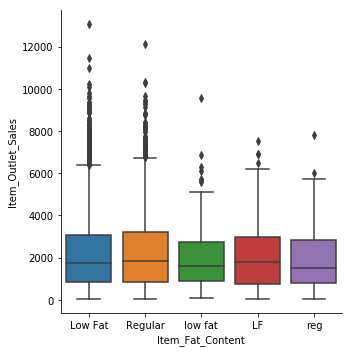

In [28]:
sns.catplot(x= "Item_Fat_Content", y = "Item_Outlet_Sales" ,data= train_data, kind = "box")
plt.show

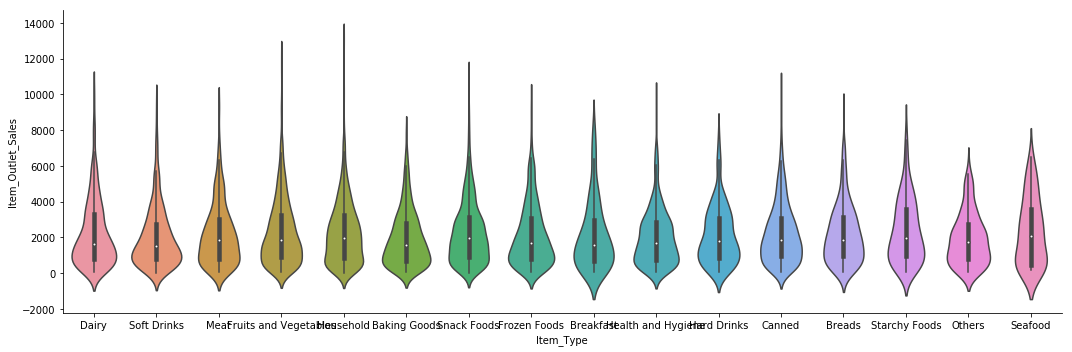

In [29]:
sns.catplot(x= "Item_Type", y = "Item_Outlet_Sales" ,data= train_data, kind = "violin", aspect=3)
plt.show()

###### c ) Categorical vs Categorical

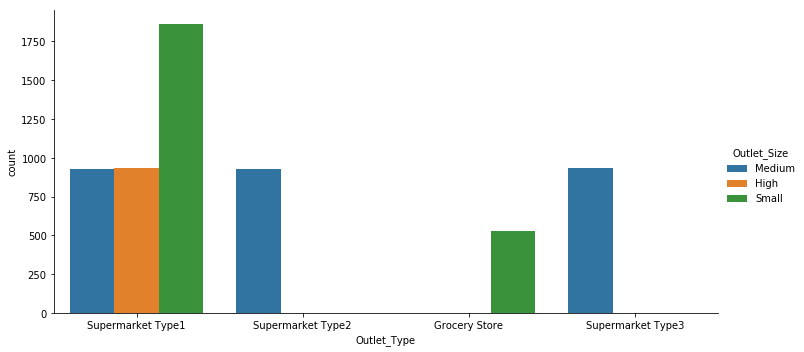

In [30]:
sns.catplot(x= "Outlet_Type", data= train_data, kind = "count", aspect = 2, hue="Outlet_Size")
plt.show()

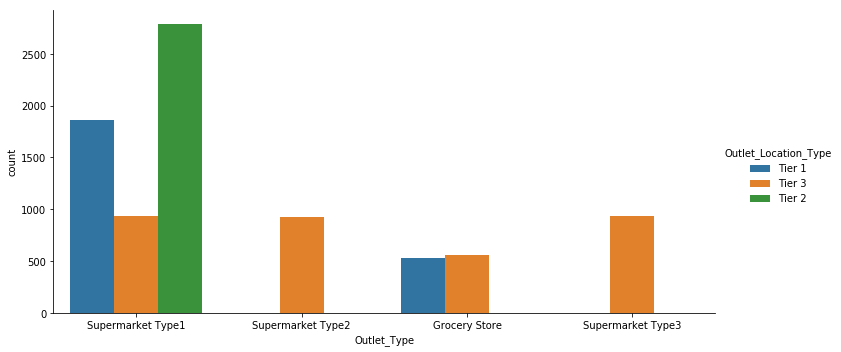

In [31]:
sns.catplot(x= "Outlet_Type", data= train_data, kind = "count", aspect = 2, hue="Outlet_Location_Type")
plt.show()

### 4. Treating Missing Values

In [32]:
data.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

###### a) Item_Weight
        Lets replace them with the mean weight of that particular item

In [33]:
item_mean_weight = data.pivot_table( index = "Item_Identifier" , values = "Item_Weight",aggfunc='mean')

print("Missing Item_Weight : " , data['Item_Weight'].isnull().sum()  )
data.loc[data['Item_Weight'].isnull(), "Item_Weight"] =   data.loc[data['Item_Weight'].isnull(), "Item_Identifier"]. apply ( lambda x : item_mean_weight.loc[x])
print("Missing Item_Weight : " , data['Item_Weight'].isnull().sum()  )

Missing Item_Weight :  2439
Missing Item_Weight :  0


###### b) Outlet_Size                  
        Lets's replace them with the most frequent outlet size of that particular Outlet Type

In [34]:
from scipy.stats import mode

outlet_mode= data.pivot_table( index = "Outlet_Type" , values = "Outlet_Size",aggfunc= lambda x : mode(x).mode[0]  )

print("Missing Outlet_Size : " , data['Outlet_Size'].isnull().sum()  )
data.loc[data['Outlet_Size'].isnull(), "Outlet_Size"] =   data.loc[data['Outlet_Size'].isnull(), "Outlet_Type"]. apply ( lambda x : outlet_mode.loc[x])
print("Missing Outlet_Size : " , data['Outlet_Size'].isnull().sum()  )

Missing Outlet_Size :  4016


C:\Users\USER\Anaconda3\lib\site-packages\scipy\stats\stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


Missing Outlet_Size :  0


In [35]:
data.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                     0
Outlet_Type                     0
source                          0
dtype: int64

### 5. Feature Engineering

#### 5.1. Data Cleaning

##### a )Item_Visibility
    There are some records with "0" Visibility. Item_visibilty contributes Sales
    So we can consider them as missing value and treat them
    Lets replace them with the mean visibility of that particular item

In [36]:
item_mean_visibility = data.pivot_table( index = "Item_Identifier" , values = "Item_Visibility",aggfunc='mean')

In [37]:
print("Rows with '''0''' visbility " , (data['Item_Visibility'] == 0).sum()  )
data.loc[data['Item_Visibility'] == 0, "Item_Visibility"] =   data.loc[data['Item_Visibility'] == 0, "Item_Identifier"]. apply ( lambda x : item_mean_visibility.loc[x])
print("Rows with '''0''' visbility " , (data['Item_Visibility'] == 0).sum()  )

Rows with '''0''' visbility  879
Rows with '''0''' visbility  0


##### b ) Item_Identifier

    Here all the values start with "FD", "DR","NC" followed by alphanumeric
        - FD : Food
        - DR : Drink
        - NC : Non- Edible
    We can create a new column

In [38]:
data["Item_combined"] = data ["Item_Identifier"].apply( lambda  x : x[0:2])
data["Item_combined"]  = data["Item_combined"]. map ( { "FD" : "Food", "DR" : "Drink",  "NC" : "Non_Edible"} )

##### c) Item_Fat_Content
    In "Item_Fat_Content" column, ( Low Fat    : LF : low fat  ) , (Regular:reg) needs to be changed
    But we have foods that are not edible ("Item_combined"). So we need to take that into consideration and change that value

In [39]:
print(data["Item_Fat_Content"].unique())
data["Item_Fat_Content"].replace ( {"low fat": "Low Fat" , "LF": "Low Fat", "reg": "Regular"} , inplace = True)
print(data["Item_Fat_Content"].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['Low Fat' 'Regular']


In [40]:
data.loc[data["Item_combined"] == "Non_Edible" , "Item_Fat_Content" ] = "Non_Edible"
print(data["Item_Fat_Content"].value_counts())

Low Fat       6499
Regular       5019
Non_Edible    2686
Name: Item_Fat_Content, dtype: int64


##### d) Outlet_Type
    Supermarket Type2 and Type3 can be combined. But we should check if that’s a good idea before doing it.
    One way of checking is , by using "mean"(Sales.
    If the Mean Sale of both are same, then we can combine them. But if they are different we cannot do it.

In [41]:
data.pivot_table(values= "Item_Outlet_Sales", index = "Outlet_Type",aggfunc='mean' )

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


     Here there is a drastic difference , so we should  not combine them

##### e) Outlet_Establishment_Year
    Given data is for 2013, so we can calculate the no of years

In [42]:
data["year"] = data["Outlet_Establishment_Year"].apply( lambda x : 2013-x )
data["year"]=data["year"].astype("int8")
data["year"].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: year, dtype: float64

###### f) Outlet_Identifier

    Identifier columns cannot be deleted since , we need them for submission

In [43]:
data["Outlet_Identifier"].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder().fit(data["Outlet_Identifier"])
data["Outlet"]= le.transform(data["Outlet_Identifier"])
data["Outlet"] = data["Outlet"].astype("category")
data["Outlet"].unique()

[9, 3, 0, 1, 5, 7, 2, 8, 6, 4]
Categories (10, int64): [9, 3, 0, 1, ..., 2, 8, 6, 4]

Correlation

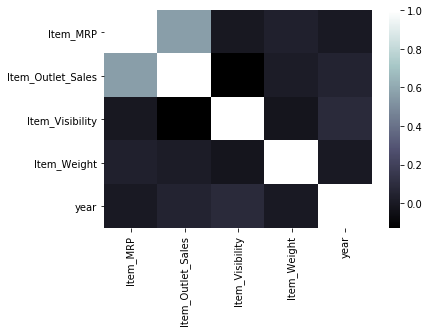

In [45]:
cor = data.corr()
sns.heatmap(cor,cmap="bone" )
plt.show()

C:\Users\USER\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\USER\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


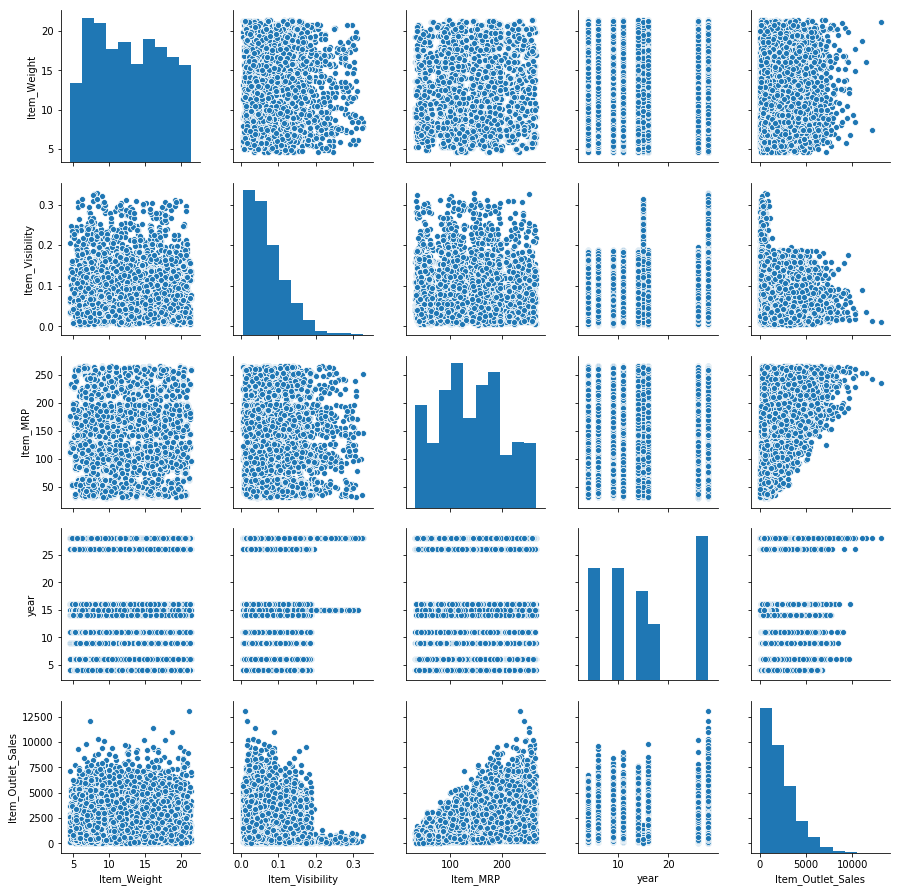

In [46]:
sns.pairplot(data[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'year', 'Item_Outlet_Sales']] )
plt.show()

### 7. One Hot Coding:

In [47]:
data.dtypes

Item_Fat_Content               object
Item_Identifier                object
Item_MRP                      float64
Item_Outlet_Sales             float64
Item_Type                      object
Item_Visibility               float64
Item_Weight                   float64
Outlet_Establishment_Year    category
Outlet_Identifier              object
Outlet_Location_Type           object
Outlet_Size                    object
Outlet_Type                    object
source                         object
Item_combined                  object
year                             int8
Outlet                       category
dtype: object

In [48]:
data= pd.get_dummies (data = data , columns = ['Item_Fat_Content','Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_combined',  'Outlet'] , drop_first = True)

In [49]:
data.dtypes

Item_Identifier                    object
Item_MRP                          float64
Item_Outlet_Sales                 float64
Item_Type                          object
Item_Visibility                   float64
Item_Weight                       float64
Outlet_Establishment_Year        category
Outlet_Identifier                  object
source                             object
year                                 int8
Item_Fat_Content_Non_Edible         uint8
Item_Fat_Content_Regular            uint8
Outlet_Size_Medium                  uint8
Outlet_Size_Small                   uint8
Outlet_Location_Type_Tier 2         uint8
Outlet_Location_Type_Tier 3         uint8
Outlet_Type_Supermarket Type1       uint8
Outlet_Type_Supermarket Type2       uint8
Outlet_Type_Supermarket Type3       uint8
Item_combined_Food                  uint8
Item_combined_Non_Edible            uint8
Outlet_1                            uint8
Outlet_2                            uint8
Outlet_3                          

In [50]:
data.head(5)

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,source,year,...,Item_combined_Non_Edible,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,train,14,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,train,4,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,train,14,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.20,1998,OUT010,train,15,...,0,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,994.7052,Household,0.009780,8.93,1987,OUT013,train,26,...,1,1,0,0,0,0,0,0,0,0


### 8. Droping Columns

In [51]:
data.drop ( ["Item_Type","Outlet_Establishment_Year"] , inplace = True , axis = 1)

### 9. Splitting the data

In [52]:
train = data.loc [data["source"] == "train"]
test = data.loc [data["source"] == "test"]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


### 10 . Model Building


In [53]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

train = pd.read_csv('train_modified.csv')
test= pd.read_csv('test_modified.csv')

print('\nShape of training data :',train.shape)
print('\nShape of testing data :',test.shape)


Shape of training data : (8523, 27)

Shape of testing data : (5681, 26)


#### 10.1 Base Model
Since we are working on a regression problem, we can use a central tendency measure as the result for all predictions, such as the mean or the median.


In [54]:
base_model = test[["Item_Identifier", "Outlet_Identifier"]]
base_model["Item_Outlet_Sales"] =  train["Item_Outlet_Sales"].median()
base_model.to_csv("base_model.csv",index=False)

#### 10.2 Models

In [55]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression , Lasso ,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate,cross_val_score
from sklearn.metrics import mean_squared_error
from math import sqrt


In [56]:
#Function 
def models(algorithm,X_val,y_val,X_train,y_train ,file_name,X_test):
    model = algorithm
    model.fit(X_train,y_train)
    
    ytrain_pred = model.predict(X_train)
    yval_pred = model.predict(X_val)
    rmse_train = np.sqrt(mean_squared_error(y_train, ytrain_pred) )
    rmse_val = np.sqrt(mean_squared_error(y_val, yval_pred) )
    
    scores_train = model.score(X_train,y_train)
    scores_val = model.score(X_val,y_val)
    
    accuracy = cross_val_score(estimator=model, X=X_train, y=y_train,cv=10)
#     print(f"The accuracy of the Polynomial Regression Model is \t {accuracy.mean()}")
#     print(f"The deviation in the accuracy is \t {accuracy.std()}")


    score.loc[file_name] = [ scores_train ,  scores_val,rmse_train, rmse_val,accuracy.mean(),accuracy.std()  ]
    
    #submission
    submission = test[["Item_Identifier", "Outlet_Identifier"]]
    submission["Item_Outlet_Sales"] =  model.predict(X_test)
    file_name = file_name + ".csv"
    submission.to_csv(file_name,index=False)

In [57]:

score = pd.DataFrame ( columns = ["Train_Score", "Validate_Score", "Train_RMSE","Validate_RMSE", "Accuuracy_Mean", "Accuracy_Std"])
y_train = train ["Item_Outlet_Sales"]

X= train.drop(["Item_Identifier","Outlet_Identifier","Item_Outlet_Sales"] , axis = 1)
y= train["Item_Outlet_Sales"]

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2,random_state = 0)

X_test= test.drop(["Item_Identifier","Outlet_Identifier"] , axis = 1)

models (LinearRegression() , X_val,y_val, X_train,y_train ,"LinearRegression",X_test)
models (Lasso() , X_val,y_val, X_train,y_train ,"Lasso",X_test)
models (Ridge() , X_val,y_val, X_train,y_train ,"Ridge",X_test)
models(DecisionTreeRegressor(max_depth=15, min_samples_leaf=100) ,  X_val,y_val, X_train,y_train ,"DecisionTreeRegressor",X_test)
models(DecisionTreeRegressor(max_depth=8, min_samples_leaf=150) ,  X_val,y_val, X_train,y_train ,"DecisionTreeRegressor2",X_test)
alg_RFR = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4) 
models (alg_RFR , X_val,y_val, X_train,y_train ,"RandomForestRegressor",X_test)
alg_RFR2 = RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=100,n_jobs=4)
models (alg_RFR2 , X_val,y_val, X_train,y_train ,"RandomForestRegressor2",X_test)

score

,Train_Score,Validate_Score,Train_RMSE,Validate_RMSE,Accuuracy_Mean,Accuracy_Std
LinearRegression,0.563172,0.564179,1127.075302,1129.418871,0.560235,0.019649
Lasso,0.563061,0.563789,1127.219088,1129.924200,0.560324,0.019544
Ridge,0.563172,0.564160,1127.075916,1129.443733,0.560245,0.019641
DecisionTreeRegressor,0.615995,0.590435,1056.735112,1094.869645,0.585711,0.015651
DecisionTreeRegressor2,0.604597,0.581781,1072.303165,1106.375656,0.584674,0.016590
RandomForestRegressor,0.605499,0.588218,1071.080168,1097.829336,0.593723,0.015512
RandomForestRegressor2,0.608376,0.589959,1067.166955,1095.505566,0.593851,0.015259


In [60]:
from sklearn import ensemble

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2, 'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)
models (clf , X_val,y_val, X_train,y_train ,"GradientBoostingRegressor",X_test)


params = {'n_estimators': 750, 'max_depth': 4, 'min_samples_split': 2, 'learning_rate': 0.00999, 'loss': 'ls', 'criterion':'mse', 'random_state' : 1}
clf = ensemble.GradientBoostingRegressor(**params )
models (clf , X_val,y_val, X_train,y_train ,"GradientBoostingRegressor2",X_test)
score



,Train_Score,Validate_Score,Train_RMSE,Validate_RMSE,Accuuracy_Mean,Accuracy_Std
LinearRegression,0.563172,0.564179,1127.075302,1129.418871,0.560235,0.019649
Lasso,0.563061,0.563789,1127.219088,1129.924200,0.560324,0.019544
Ridge,0.563172,0.564160,1127.075916,1129.443733,0.560245,0.019641
DecisionTreeRegressor,0.615995,0.590435,1056.735112,1094.869645,0.585711,0.015651
DecisionTreeRegressor2,0.604597,0.581781,1072.303165,1106.375656,0.584674,0.016590
RandomForestRegressor,0.605499,0.588218,1071.080168,1097.829336,0.593723,0.015512
RandomForestRegressor2,0.608376,0.589959,1067.166955,1095.505566,0.593851,0.015259
GradientBoostingRegressor,0.642622,0.593710,1019.440056,1090.483185,0.589180,0.021047
GradientBoostingRegressor2,0.656500,0.592086,999.449462,1092.660342,0.585256,0.020617


In [62]:
from sklearn.linear_model import ElasticNetCV, ElasticNet

cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=100, fit_intercept=True, 
                        normalize=True, precompute='auto', max_iter=2000, tol=0.0001, cv=5, 
                        copy_X=True, verbose=0, n_jobs=-1, positive=False, random_state=None, selection='cyclic')
cv_model.fit(X_train, y_train)

e_net = ElasticNet(l1_ratio=cv_model.l1_ratio_, alpha = cv_model.alpha_, max_iter=cv_model.n_iter_, fit_intercept=True, normalize = True)

models (e_net , X_val,y_val, X_train,y_train ,"ElasticNet",X_test)
score

,Train_Score,Validate_Score,Train_RMSE,Validate_RMSE,Accuuracy_Mean,Accuracy_Std
LinearRegression,0.563172,0.564179,1127.075302,1129.418871,0.560235,0.019649
Lasso,0.563061,0.563789,1127.219088,1129.924200,0.560324,0.019544
Ridge,0.563172,0.564160,1127.075916,1129.443733,0.560245,0.019641
DecisionTreeRegressor,0.615995,0.590435,1056.735112,1094.869645,0.585711,0.015651
DecisionTreeRegressor2,0.604597,0.581781,1072.303165,1106.375656,0.584674,0.016590
RandomForestRegressor,0.605499,0.588218,1071.080168,1097.829336,0.593723,0.015512
RandomForestRegressor2,0.608376,0.589959,1067.166955,1095.505566,0.593851,0.015259
GradientBoostingRegressor,0.642622,0.593710,1019.440056,1090.483185,0.589180,0.021047
GradientBoostingRegressor2,0.656500,0.592086,999.449462,1092.660342,0.585256,0.020617
ElasticNet,0.563129,0.564020,1127.130483,1129.624442,0.560308,0.019490
